In [52]:
from pylab import *
%run "Untitled1.ipynb"
%matplotlib inline

Hay que resolver $$\frac{d^2 \vec \rho}{d \tau ^2} = - \frac{\hat \rho}{\rho ^2}$$

# Usando Runge-Kutta(segundo orden)

In [30]:
def mov_planeta(x,t):
    r3 = (x[0]**2 + x[1]**2)**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx,dry,dvrx,dvry])

CPU times: user 37.1 ms, sys: 0 ns, total: 37.1 ms
Wall time: 36.5 ms


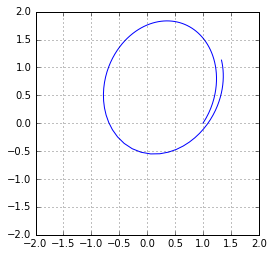

In [53]:
%%time
t,r_vr = rk2(mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom = 2
xlim([-zoom,zoom]), ylim([-zoom,zoom])
plot(r_vr[:,0],r_vr[:,1])
axes().set_aspect('equal'), grid(True)
show

# Usando el segundo integrador(con Jacobiano)

In [54]:
def J_mov_planeta(x,t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]**2 + x[1]**2)**(2.5)
    rxmry = (2*x[0]*x[0]-x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1]-x[0]*x[0])/r5
    rxry = (3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec,Jac

CPU times: user 38.4 ms, sys: 0 ns, total: 38.4 ms
Wall time: 37.6 ms


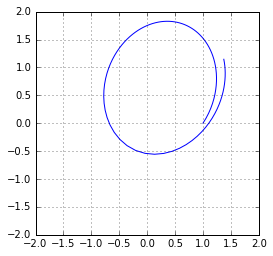

In [55]:
%%time
t,r_vr = integra2(mov_planeta,J_mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom = 2
xlim([-zoom,zoom]), ylim([-zoom,zoom])
plot(r_vr[:,0],r_vr[:,1])
axes().set_aspect('equal'), grid(True)
show

# Runge-Kutta(cuarto orden)

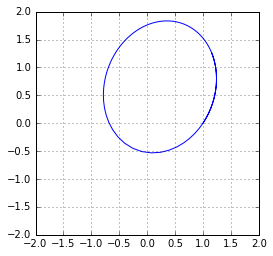

CPU times: user 130 ms, sys: 2.91 ms, total: 133 ms
Wall time: 132 ms


In [64]:
%%time
t,r_vr = rk4(mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom = 2
xlim([-zoom,zoom]), ylim([-zoom,zoom])
plot(r_vr[:,0],r_vr[:,1],)
axes().set_aspect('equal'), grid(True)
show()

In [67]:
from scipy.integrate import*

In [61]:
h = 0.1
tiempos = arange(0,10+h,h)

In [1]:
%%time
r_vr = odeint(mov_planeta,[1,0,.2,.9],tiempos)
zoom = 1.5
xlim([-zoom,zoom]), ylim([-zoom,zoom])
plot(r_vr[:,0],r_vr[:,1],)
axes().set_aspect('equal'), grid(True)
show()

NameError: name 'odeint' is not defined